TASK4: SALES PREDICTION USING PYTHON

NAME OF INTERN: ANCHIRINAAH HEZEKIAH

BATCH: MAY BATCH A50

AIM: TO PRODUCE A MODEL THAT PREDICTS SALES

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

DATASETS


In [3]:
#CALLING THE DATASET
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#DIMENSION OF DATASET
print(f'''Number of rows: {df.shape[0]}
      number of columns: {df.shape[1]}''')

Number of rows: 200
      number of columns: 4


In [5]:
#CHECKING FOR THE MISSING VALUES
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation among the variables')

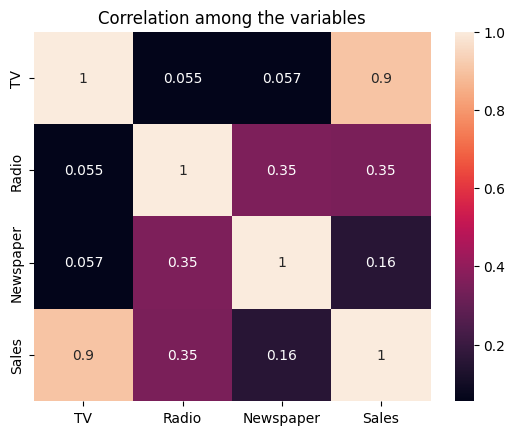

In [6]:
#CORRELATION AMONG THE VARIABLES
sns.heatmap(df.corr(), annot=True, fmt= '.2g')
plt.title("Correlation among the variables")

Text(0, 0.5, 'Values')

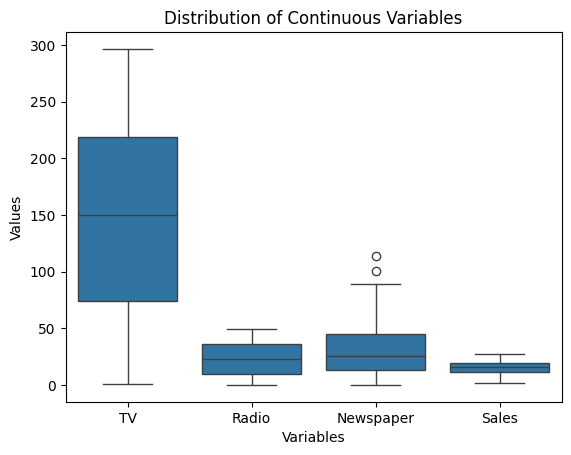

In [7]:
#DISTRIBUTION OF THE VARIABLES 
sns.boxplot(df.melt(value_vars=df.columns), x='variable', y='value')
plt.title('Distribution of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

DATASET PREPARATION

In [8]:
#GETTING THE X AND Y
x = df.drop(['Sales'], axis=1)
y = df['Sales']

In [9]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET
X_train, X_test, y_train, y_test = train_test_split(x,  y ,test_size=0.2, random_state=101)
print(f'''X Train: {X_train.shape}
X Test: {X_test.shape}
y Train: {y_train.shape}
y Test: {y_test.shape}''')

X Train: (160, 3)
X Test: (40, 3)
y Train: (160,)
y Test: (40,)


In [10]:
#PREPROCESSING
preprocess = Pipeline([
    ('Scaler', StandardScaler())
])

#MODEL
model = Pipeline([
    ('preprocess', preprocess),
    ('regressor', RandomForestRegressor())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('Scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [11]:
#PREDICTION
y_pred = model.predict(X_test)
print(f'Testing Accuracy: {round(100*r2_score(y_test,y_pred),2)}%')

Testing Accuracy: 93.89%


In [12]:
#SAVING THE MODEL
with open('./model.pkl', 'wb') as fp:
    pickle.dump(model, fp)